# Envi

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.hatch
import matplotlib.pyplot as plt
import mplotutils as mpu
import numpy as np
from matplotlib.path import Path
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Function List

Please see the plot.py

# Demo

## Global IPCC

In [3]:
from utils import plot

In [4]:
import xarray as xr
file_name='data/ERA5temp_1978_monthly.nc' 
ds=xr.open_dataset(file_name)
lat = ds['latitude']
lon = ds['longitude']


ds = ds.rename_dims({'latitude':'lat','longitude':'lon'})
ds.coords['lat'] = ('lat', lat.to_numpy())
ds.coords['lon'] = ('lon', lon.to_numpy()) # 对维度lon指定新的坐标信息lon
ds = ds.reset_coords(names=['latitude','longitude'], drop=True)
ds['t2m'] = ds['t2m'] - 273.15
ds['t2m']

<xarray.DataArray 't2m' (time: 12, lat: 721, lon: 1440)>
array([[[-30.659515, -30.659515, -30.659515, ..., -30.659515,
         -30.659515, -30.659515],
        [-30.748047, -30.748047, -30.748047, ..., -30.748047,
         -30.748047, -30.748047],
        [-30.836563, -30.836563, -30.836563, ..., -30.836563,
         -30.836563, -30.836563],
        ...,
        [-31.30986 , -31.30986 , -31.306458, ..., -31.31157 ,
         -31.31157 , -31.30986 ],
        [-31.503952, -31.503952, -31.503952, ..., -31.507355,
         -31.507355, -31.507355],
        [-31.820618, -31.820618, -31.820618, ..., -31.820618,
         -31.820618, -31.820618]],

       [[-30.250916, -30.250916, -30.250916, ..., -30.250916,
         -30.250916, -30.250916],
        [-30.174301, -30.174301, -30.175995, ..., -30.174301,
         -30.174301, -30.174301],
        [-30.090881, -30.090881, -30.092575, ..., -30.089172,
         -30.090881, -30.090881],
...
        [-36.669327, -36.671036, -36.671036, ..., -36.667633,
         -36.667633, -36.669327],
        [-36.582504, -36.582504, -36.582504, ..., -36.582504,
         -36.582504, -36.582504],
        [-36.635284, -36.635284, -36.635284, ..., -36.635284,
         -36.635284, -36.635284]],

       [[-27.458817, -27.458817, -27.458817, ..., -27.458817,
         -27.458817, -27.458817],
        [-27.404327, -27.404327, -27.404327, ..., -27.404327,
         -27.404327, -27.404327],
        [-27.29367 , -27.29367 , -27.29367 , ..., -27.29538 ,
         -27.29538 , -27.29538 ],
        ...,
        [-29.363907, -29.363907, -29.363907, ..., -29.365616,
         -29.363907, -29.363907],
        [-29.469467, -29.469467, -29.469467, ..., -29.47116 ,
         -29.47116 , -29.469467],
        [-29.695892, -29.695892, -29.695892, ..., -29.695892,
         -29.695892, -29.695892]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1978-01-01 1978-02-01 ... 1978-12-01
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

In [5]:
type(np.array(ds['t2m'][0]))

numpy.ndarray

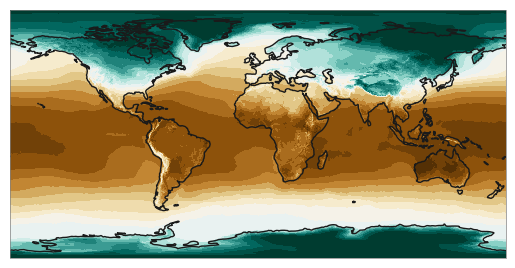

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()
proj = ccrs.PlateCarree() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-30, 30, num=19)
plot.one_map_flat(ds['t2m'][0], ax, levels=levels, cmap="BrBG_r", mask_ocean=False, add_coastlines=True, add_land=False, plotfunc="pcolormesh")

In [7]:
#import rioxarray as xrx
#p = rxr.open_rasterio(filename)
p = np.mean(ds['t2m'], 0) > -20

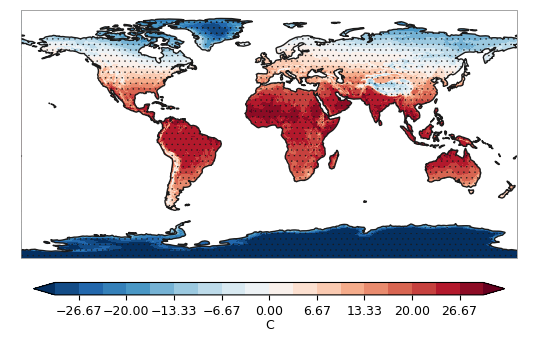

In [8]:
fig = plt.figure()  
proj = ccrs.PlateCarree()  #ccrs.Robinson()  
#proj = ccrs.Robinson()  
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-30, 30, num=19)
plot.one_map(ds['t2m'], ax,  average='mean', dim='time', cmap="RdBu_r", levels=levels,  mask_ocean=True,  add_coastlines=True,  add_land=True,  plotfunc="pcolormesh", colorbar=True, getmean=True)
plot.hatch_map(ax, p, 3 * ".", label="Lack of model agreement", invert=True, linewidth=0.25, color="0.1")

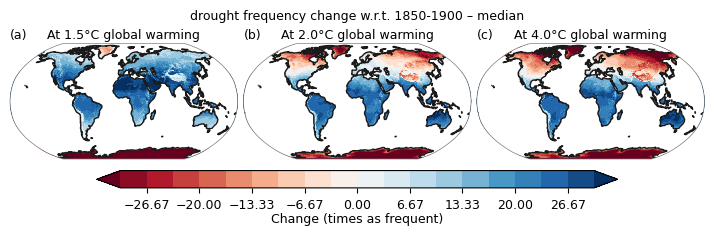

In [9]:
at_warming_c = []
at_warming_c.append(ds['t2m'][5:8])
at_warming_c.append(ds['t2m'][9:12])
at_warming_c.append(ds['t2m'][0:3])
len(at_warming_c)

#fig = plt.figure()   
#proj = ccrs.Robinson()  
#
#ax = fig.add_subplot(131, projection=proj)
plot.at_warming_level_one(at_warming_c=at_warming_c, unit="Change (times as frequent)", title='drought frequency change w.r.t. 1850-1900', \
                     average="median",  mask_ocean=True,  colorbar=True, cmap="RdBu",  dim='time', add_legend=False, hatch_data=None, levels=levels, plotfunc='pcolormesh', getmean=True)


## Regional

In [10]:
import xarray as xr
file_name='data/ET_trend.tif' 
ds=xr.open_dataset(file_name)
data = ds['band_data'][0]

In [11]:
file_name='data/ET_p.tif' 
ds=xr.open_dataset(file_name)
p = ds['band_data'][0]

In [12]:
datap = p < 0.05
lat = ds['y']
lon = ds['x']
datap = datap.swap_dims({'y':'lat','x':'lon'})
datap.coords['lat'] = ('lat',lat.to_numpy())
datap.coords['lon'] = ('lon',lon.to_numpy()) # 对维度lon指定新的坐标信息lon
datap = datap.reset_coords(names=['y','x'], drop=True)

In [13]:
datap

<xarray.DataArray 'band_data' (lat: 2544, lon: 6999)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    band         int32 1
    spatial_ref  int32 ...
  * lat          (lat) float64 35.9 35.89 35.89 35.89 ... 24.49 24.48 24.48
  * lon          (lon) float64 90.54 90.55 90.55 90.56 ... 122.0 122.0 122.0

In [14]:
import salem
import geopandas as gpd
shp_dir='data/Yangtze_4326.shp'
shpfile=gpd.read_file(shp_dir)
pmaskregion=datap.salem.roi(shape=shpfile)

区域一般选择默认投影，因此不能修改投影

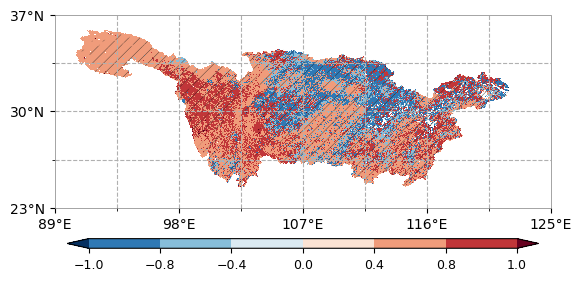

In [15]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()
proj = ccrs.PlateCarree() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.array([-1, -0.8, -0.4, 0, 0.4, 0.8, 1])#levels = np.linspace(-1, 1, num=19)
plot.one_map_region(data, ax, levels=levels,  extents=[89, 125, 23, 37], interval=[9, 7], mask_ocean=False, add_coastlines=False, add_land=False, add_gridlines=True, colorbar=True, plotfunc="pcolormesh")
plot.hatch_map(ax, pmaskregion, 3 * "/", label="Lack of model agreement", invert=True, linewidth=0.25, color="0.1")
#plt.savefig("test.png", dpi=300)

在新的``plot.one_map_region``函数中，绘制全球格网经纬度地图，需要指定范围和间隔，而且不能改投影，不太方便

In [16]:
import xarray as xr
file_name='data/ERA5temp_1978_monthly.nc' 
ds=xr.open_dataset(file_name)
lat = ds['latitude']
lon = ds['longitude']


ds = ds.rename_dims({'latitude':'lat','longitude':'lon'})
ds.coords['lat'] = ('lat', lat.to_numpy())
ds.coords['lon'] = ('lon', lon.to_numpy()) # 对维度lon指定新的坐标信息lon
ds = ds.reset_coords(names=['latitude','longitude'], drop=True)
ds['t2m'] = ds['t2m'] - 273.15
ds['t2m']

<xarray.DataArray 't2m' (time: 12, lat: 721, lon: 1440)>
array([[[-30.659515, -30.659515, -30.659515, ..., -30.659515,
         -30.659515, -30.659515],
        [-30.748047, -30.748047, -30.748047, ..., -30.748047,
         -30.748047, -30.748047],
        [-30.836563, -30.836563, -30.836563, ..., -30.836563,
         -30.836563, -30.836563],
        ...,
        [-31.30986 , -31.30986 , -31.306458, ..., -31.31157 ,
         -31.31157 , -31.30986 ],
        [-31.503952, -31.503952, -31.503952, ..., -31.507355,
         -31.507355, -31.507355],
        [-31.820618, -31.820618, -31.820618, ..., -31.820618,
         -31.820618, -31.820618]],

       [[-30.250916, -30.250916, -30.250916, ..., -30.250916,
         -30.250916, -30.250916],
        [-30.174301, -30.174301, -30.175995, ..., -30.174301,
         -30.174301, -30.174301],
        [-30.090881, -30.090881, -30.092575, ..., -30.089172,
         -30.090881, -30.090881],
...
        [-36.669327, -36.671036, -36.671036, ..., -36.667633,
         -36.667633, -36.669327],
        [-36.582504, -36.582504, -36.582504, ..., -36.582504,
         -36.582504, -36.582504],
        [-36.635284, -36.635284, -36.635284, ..., -36.635284,
         -36.635284, -36.635284]],

       [[-27.458817, -27.458817, -27.458817, ..., -27.458817,
         -27.458817, -27.458817],
        [-27.404327, -27.404327, -27.404327, ..., -27.404327,
         -27.404327, -27.404327],
        [-27.29367 , -27.29367 , -27.29367 , ..., -27.29538 ,
         -27.29538 , -27.29538 ],
        ...,
        [-29.363907, -29.363907, -29.363907, ..., -29.365616,
         -29.363907, -29.363907],
        [-29.469467, -29.469467, -29.469467, ..., -29.47116 ,
         -29.47116 , -29.469467],
        [-29.695892, -29.695892, -29.695892, ..., -29.695892,
         -29.695892, -29.695892]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1978-01-01 1978-02-01 ... 1978-12-01
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

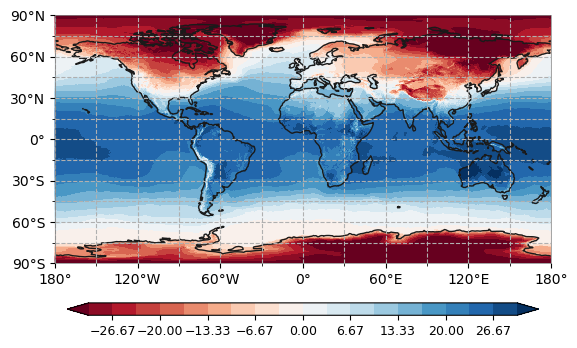

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()
proj = ccrs.PlateCarree() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-30, 30, num=19)
plot.one_map_region(ds['t2m'][0], ax, extents=[-180, 180, -90, 90], interval=[60, 30], levels=levels, cmap="RdBu", mask_ocean=False, add_coastlines=True, add_land=False, add_gridlines=True, colorbar=True, plotfunc="pcolormesh")

因此，有新的``one_map_global_line``函数，默认了格网经纬度

In [18]:
import xarray as xr
file_name='D:/Acdemic/TWSA_sen/data_v1/r2.tif' 
ds=xr.open_dataset(file_name)
data = ds['band_data'][0]

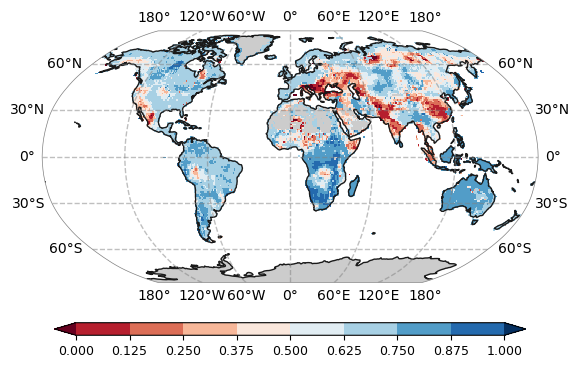

In [19]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()
proj = ccrs.Robinson() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(0, 1, num=9)
plot.one_map_global_line(data, ax, levels=levels, cmap="RdBu",  mask_ocean=False, add_coastlines=True, add_land=True,  colorbar=True, plotfunc="pcolormesh")

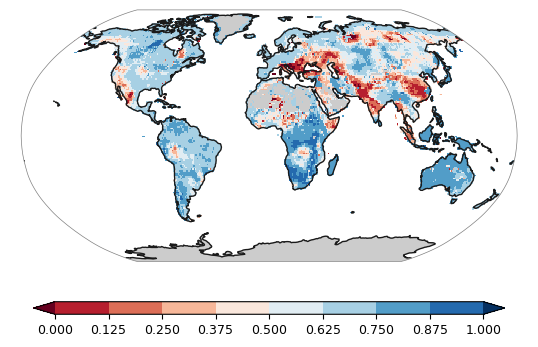

In [20]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()
proj = ccrs.Robinson() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(0, 1, num=9)
plot.one_map_flat(data, ax, levels=levels, cmap="RdBu",  mask_ocean=False, add_coastlines=True, add_land=True,  colorbar=True, plotfunc="pcolormesh")


由于区域尺度特殊性，不容易看出区域的位置，因此又添加了``add_river``,``add_lake``,``add_stock``函数

上述函数分别决定是否添加河流、湖泊和背景影像图

In [6]:
import xarray as xr
file_name='data/data_trend.tif' 
ds=xr.open_dataset(file_name)
data = ds['band_data'][0]

In [7]:
file_name='data/data_p.tif' 
ds=xr.open_dataset(file_name)
p = ds['band_data'][0]

In [8]:
datap = p < 0.05
lat = ds['y']
lon = ds['x']
datap = datap.swap_dims({'y':'lat','x':'lon'})
datap.coords['lat'] = ('lat',lat.to_numpy())
datap.coords['lon'] = ('lon',lon.to_numpy()) # 对维度lon指定新的坐标信息lon
datap = datap.reset_coords(names=['y','x'], drop=True)

In [9]:
datap

<xarray.DataArray 'band_data' (lat: 124, lon: 362)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    band         int32 1
    spatial_ref  int32 ...
  * lat          (lat) float64 54.63 54.38 54.13 53.88 ... 24.38 24.13 23.88
  * lon          (lon) float64 35.38 35.63 35.88 36.13 ... 125.1 125.4 125.6

In [11]:
import salem
import geopandas as gpd
shp_dir='data/GRDC.shp'
shpfile=gpd.read_file(shp_dir)
pmaskregion=datap.salem.roi(shape=shpfile)

In [12]:
from utils import plot

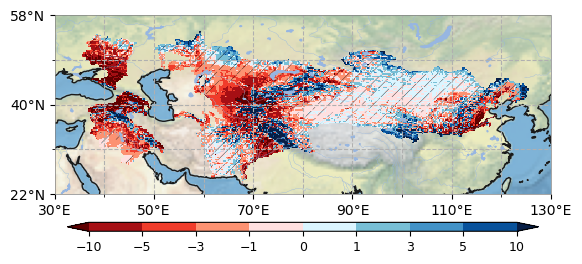

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cmaps
fig = plt.figure()
proj = ccrs.PlateCarree() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.array([-10, -5, -3, -1, 0, 1, 3, 5, 10])#levels = np.linspace(-1, 1, num=19)
plot.one_map_region(data, ax, cmap=cmaps.temp_19lev_r, levels=levels,  extents=[30, 130, 22, 58], interval=[20, 18], mask_ocean=False, add_coastlines=True, add_land=False, add_river=True, add_lake=True, add_stock=True, add_gridlines=True, colorbar=True, plotfunc="pcolormesh")
plot.hatch_map(ax, pmaskregion, 3 * "/", label="Lack of model agreement", invert=True, linewidth=0.25, color="black")
#cmap='RdYlGn' colors=mycolor
#plt.savefig('temp.png', dpi=300) 